In [26]:
#Logistic Regression using Gradient Descent Technique and also cost function. 
#Mohsin Essani
#Assignment 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# load the dataset
df = pd.read_csv("bank_data.csv")


In [2]:
# EDA
print(df.describe())
print(df.info())



                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

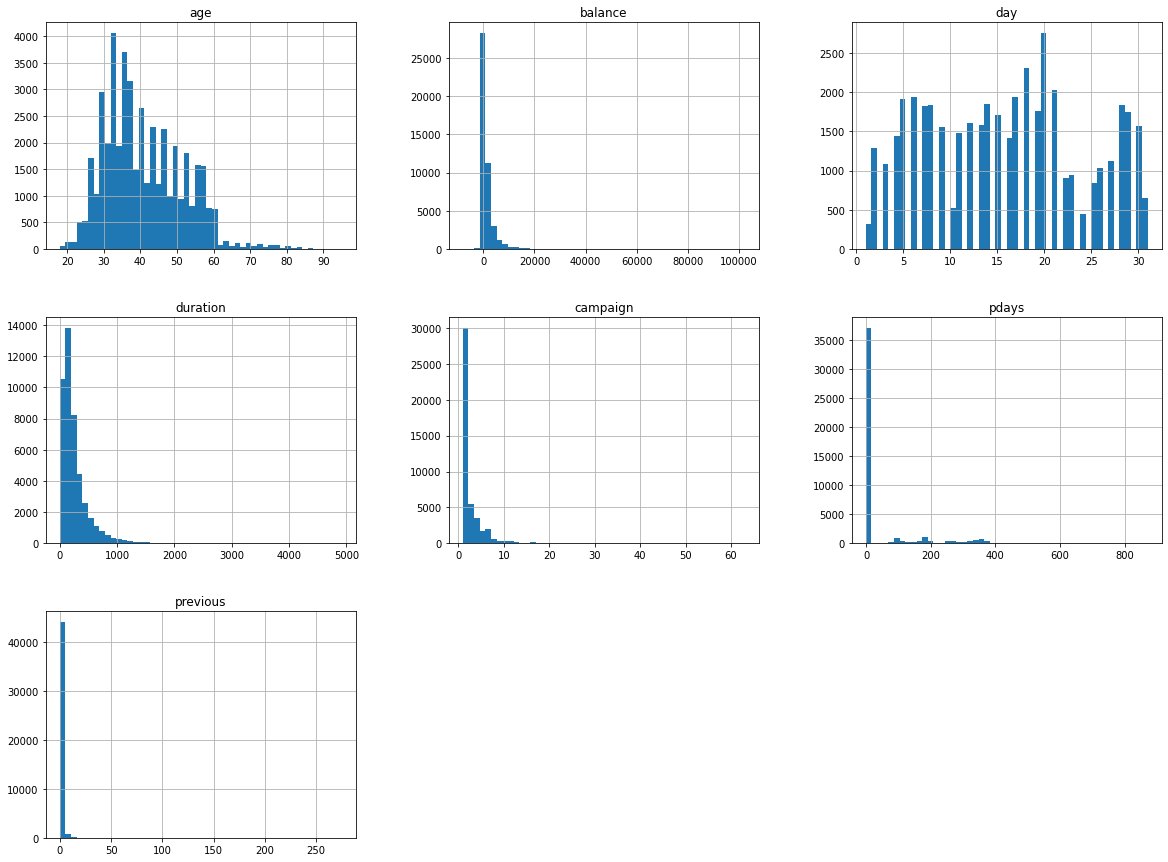

In [4]:
# Plot histograms for each numeric feature
df.hist(bins=50, figsize=(20,15))
plt.show()


In [5]:
# Create Dummy variables for categorical features
df = pd.get_dummies(df, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])


In [6]:

# Split into Features and target
X = df.drop("y", axis=1)
y = df["y"].apply(lambda x: 1 if x == "yes" else 0)

In [7]:
# Scale features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [8]:
# Add intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [9]:

# Gradient Descent
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        h = sigmoid(X @ theta)
        theta = theta - alpha * (1/m) * X.T @ (h - y)
    return theta



def predict(X, theta):
    h = sigmoid(X @ theta)
    return h >= 0.5



In [10]:
theta = np.zeros(X.shape[1])
theta = gradient_descent(X, y, theta, 0.1, 1000)


In [11]:
# Predict on Training Data
y_pred = predict(X, theta)

In [12]:
# Calculate Accuracy
accuracy_value = np.mean(y_pred == y)
print("Accuracy: ", accuracy_value)

Accuracy:  0.9019265223065184


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
alpha = 0.1
iterations = 1000
# Fit logistic regression model on training set
theta = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Predict on test set
y_test_pred = predict(X_test, theta)

In [15]:
y_test

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: y, Length: 9043, dtype: int64

In [16]:
# Print test set accuracy
print("Test set accuracy: ", accuracy_score(y_test_pred, y_test))


Test set accuracy:  0.898595598805706


In [17]:
# Predict on training set
y_train_pred = predict(X_train, theta)

In [18]:

# Print training set accuracy
print("Training set accuracy: ", accuracy_score(y_train_pred, y_train))

Training set accuracy:  0.9027040477770405


In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, r2_score
import statsmodels.api as sm

y_true = y
y_pred = y_pred.astype(int)



In [20]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[38949   973]
 [ 3461  1828]]


In [21]:
# Classification Report
cr = classification_report(y_true, y_pred)
print("Classification Report: \n", cr)


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.35      0.45      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



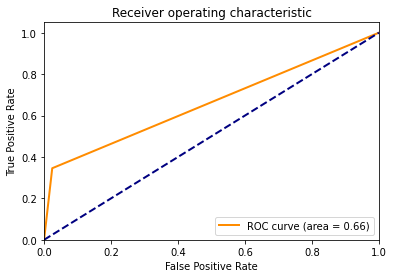

In [22]:

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [23]:
# AUC Score
print("AUC Score: ", roc_auc)

AUC Score:  0.6606252323435502


In [24]:
# Coefficient of determination (R²)
r2 = r2_score(y_true, y_pred)
print("Coefficient of determination (R²): ", r2)



Coefficient of determination (R²):  0.05058968789479823


In [25]:

# Odds Ratio and P-values
logit_model=sm.Logit(y_true, X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.238463
         Iterations: 35


C:\Users\Mohsin\anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.339     
Dependent Variable:    y                 AIC:               21650.2702
Date:                  2023-02-01 22:48  BIC:               22033.9104
No. Observations:      45211             Log-Likelihood:    -10781.   
Df Model:              43                LL-Null:           -16315.   
Df Residuals:          45167             LLR p-value:       0.0000    
Converged:             0.0000            Scale:             1.0000    
No. Iterations:        35.0000                                        
----------------------------------------------------------------------
       Coef.    Std.Err.       z     P>|z|      [0.025       0.975]   
----------------------------------------------------------------------
const -2.8437       0.0255 -111.6650 0.0000       -2.8936      -2.7937
x1     0.0012       0.0234    0.0511 0.9592       -0.0447       0.0471
x2     0.0391       0.0157    2.49